In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'C:\Users\asus 1\Desktop\Fliprobo\Machine learning projects\GLobal Power Plant database.csv')

In [3]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
data.shape

(907, 27)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
data.duplicated().sum()

0

In [7]:
data.drop(columns=['country', 'country_long', 'url', 'year_of_capacity_data', 'gppd_idnr', 'owner', 'other_fuel3', 'other_fuel2', 'estimated_generation_gwh', 'wepp_id', 'generation_gwh_2019', 'generation_gwh_2013' ], axis=1, inplace=True)

In [8]:
#finding the percentage of data missing from the dataset
missing_values=data.isnull().sum().sort_values(ascending=True)
percentage_missing_values=(missing_values/len(data))*100
print(pd.concat([missing_values, percentage_missing_values], axis=1, keys=['Missing Values', '% Missing values']))

                        Missing Values  % Missing values
name                                 0          0.000000
capacity_mw                          0          0.000000
primary_fuel                         0          0.000000
source                               0          0.000000
geolocation_source                  19          2.094818
latitude                            46          5.071665
longitude                           46          5.071665
commissioning_year                 380         41.896362
generation_data_source             458         50.496141
generation_gwh_2018                459         50.606395
generation_gwh_2017                467         51.488423
generation_gwh_2016                473         52.149945
generation_gwh_2015                485         53.472988
generation_gwh_2014                509         56.119074
other_fuel1                        709         78.169791


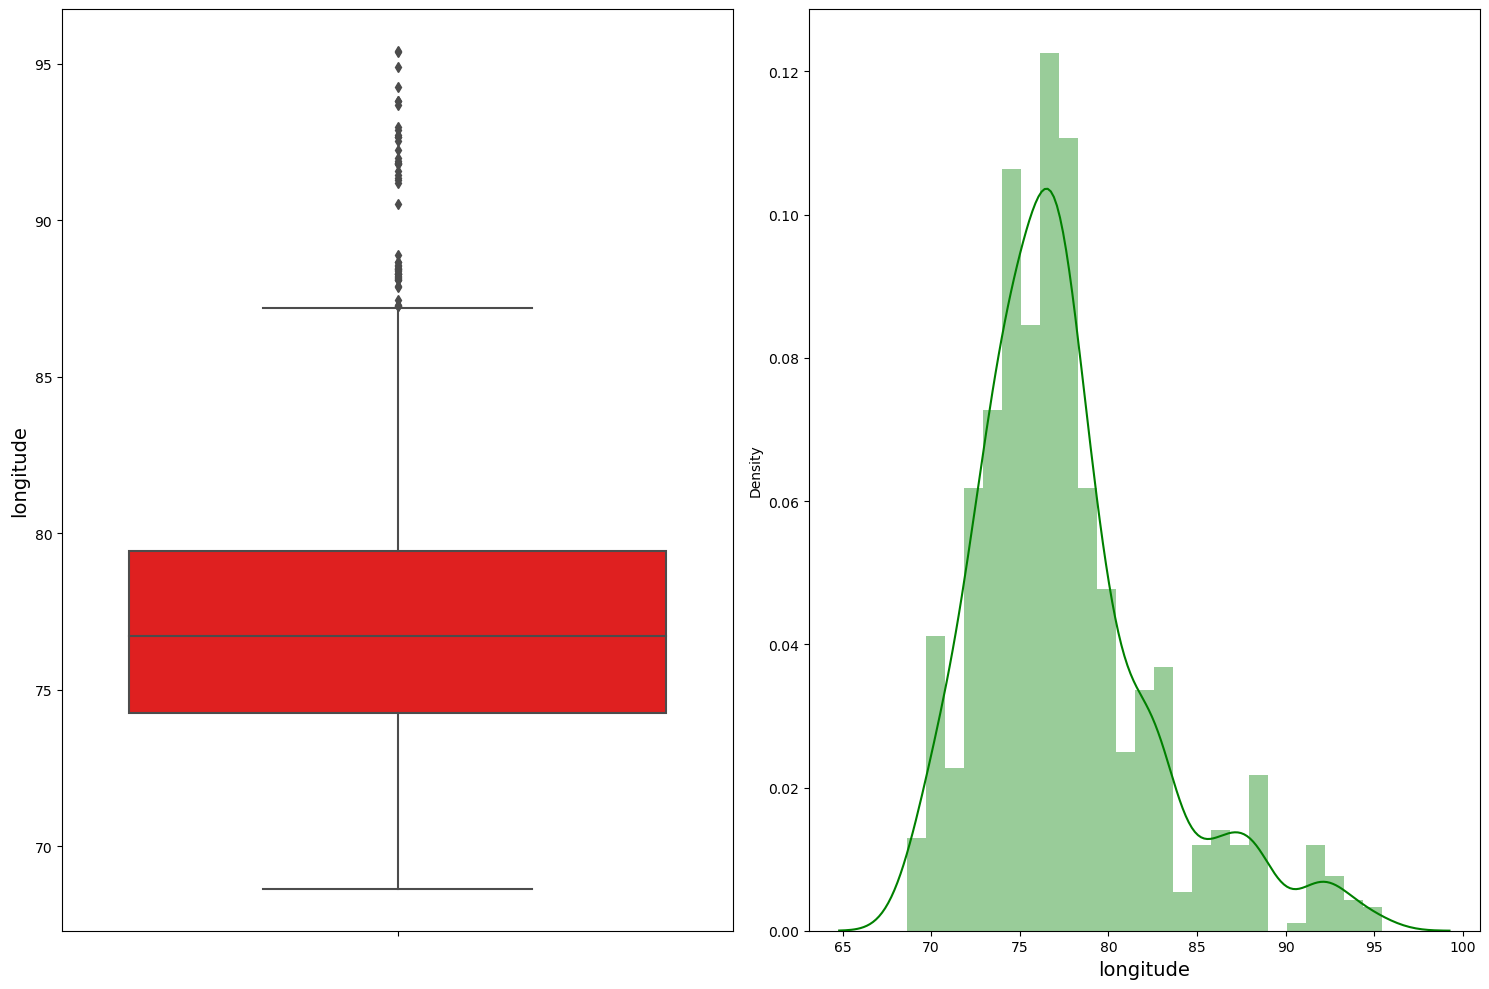

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot( y='longitude', data=data,color='red')
plt.ylabel('longitude', fontsize=14)
plt.subplot(1,2,2)
sns.distplot(data['longitude'], color='green')
plt.xlabel('longitude', fontsize=14)
plt.tight_layout()
plt.show()

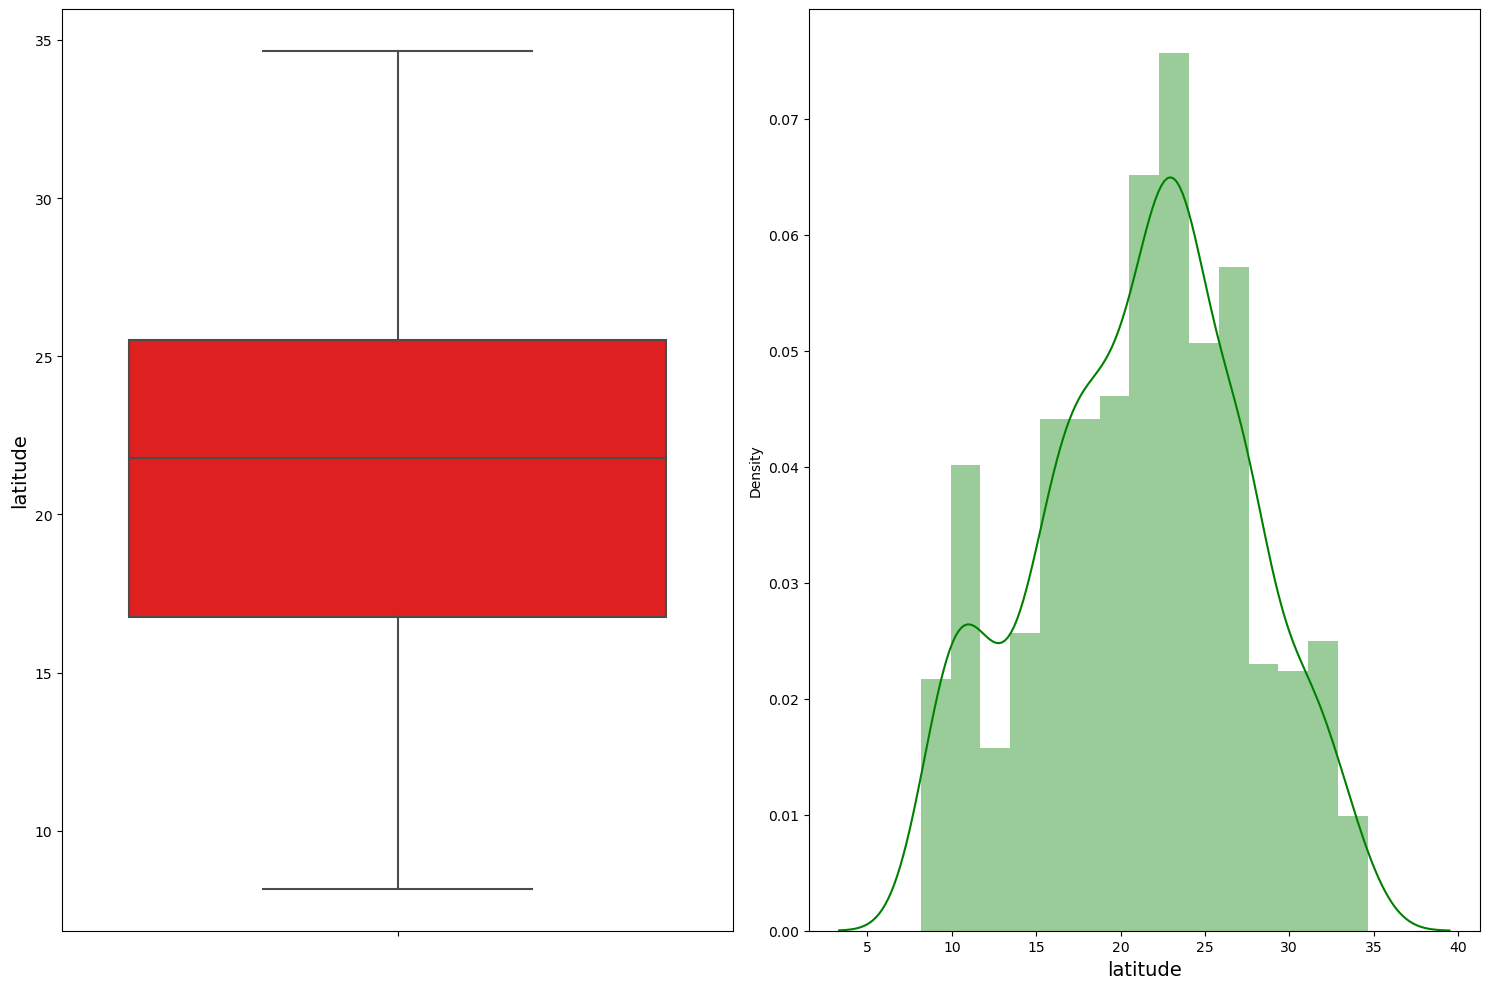

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot( y='latitude', data=data,color='red')
plt.ylabel('latitude', fontsize=14)
plt.subplot(1,2,2)
sns.distplot(data['latitude'], color='green')
plt.xlabel('latitude', fontsize=14)
plt.tight_layout()
plt.show()

In [11]:
#Outliers are present in Longitude data but not in latitude ao we will replace the nan values of longitude with median and latitude with mean

In [12]:
#Filling the missing data
data['geolocation_source']=data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])
data['longitude'] = data['longitude'].fillna(data['longitude'].median())
data['latitude'] = data['latitude'].fillna(data['latitude'].mean())

In [13]:
missing_values=data.isnull().sum().sort_values(ascending=True)
percentage_missing_values=(missing_values/len(data))*100
print(pd.concat([missing_values, percentage_missing_values], axis=1, keys=['Missing Values', '% Missing values']))

                        Missing Values  % Missing values
name                                 0          0.000000
capacity_mw                          0          0.000000
latitude                             0          0.000000
longitude                            0          0.000000
primary_fuel                         0          0.000000
source                               0          0.000000
geolocation_source                   0          0.000000
commissioning_year                 380         41.896362
generation_data_source             458         50.496141
generation_gwh_2018                459         50.606395
generation_gwh_2017                467         51.488423
generation_gwh_2016                473         52.149945
generation_gwh_2015                485         53.472988
generation_gwh_2014                509         56.119074
other_fuel1                        709         78.169791


In [14]:
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,527.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.427103,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.815073,17.082868,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1988.000000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.281800,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.176450,79.206100,2012.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [15]:
#We have two target variables Capacity and primary fuel and we will be using regression and classification methods for them respectively

# Capacity

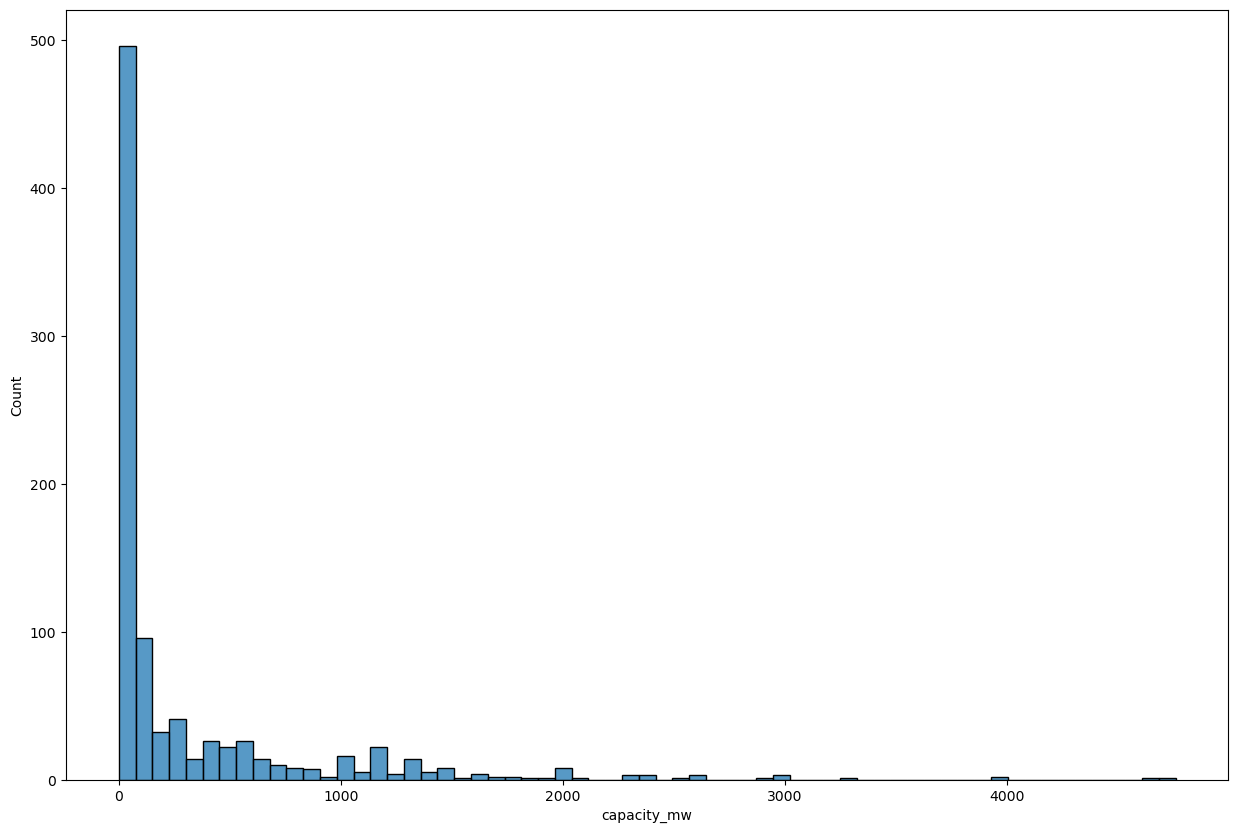

In [16]:
plt.figure(figsize=(15,10))
sns.histplot(data.capacity_mw)
plt.show()

In [17]:
#there are a very few powerplants with capacity more than 1500MW

In [18]:
data['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [19]:
#Main primary fuel used in the powerplants is Coal, followed by Hydro and the minimum is Nuclear and oil

<AxesSubplot:ylabel='primary_fuel'>

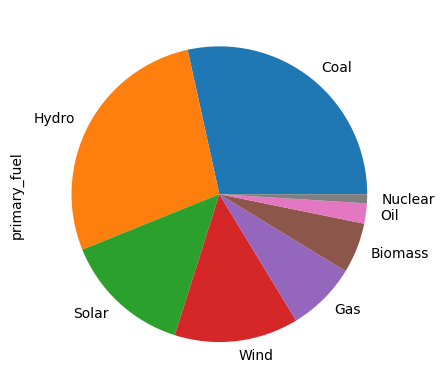

In [20]:
data['primary_fuel'].value_counts().plot.pie()

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

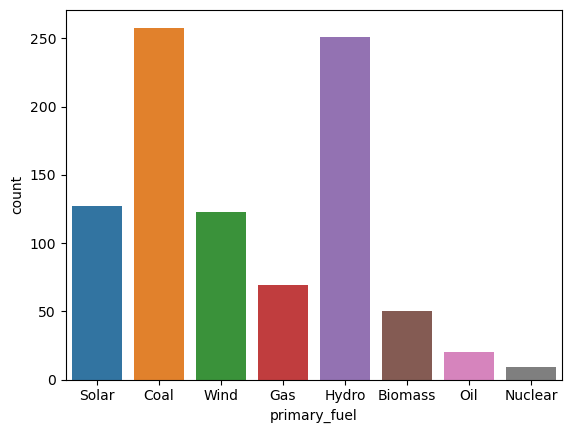

In [21]:
sns.countplot('primary_fuel',data=data)

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

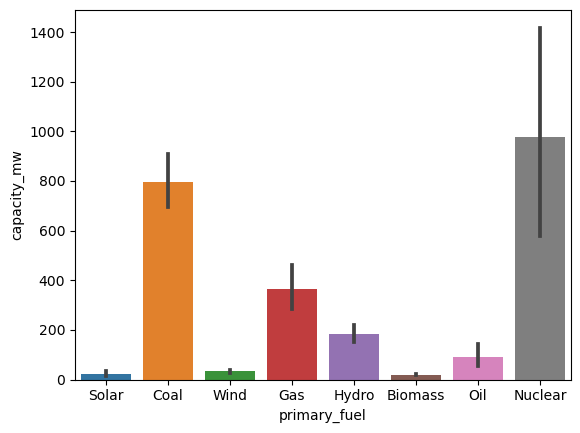

In [22]:
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = data)

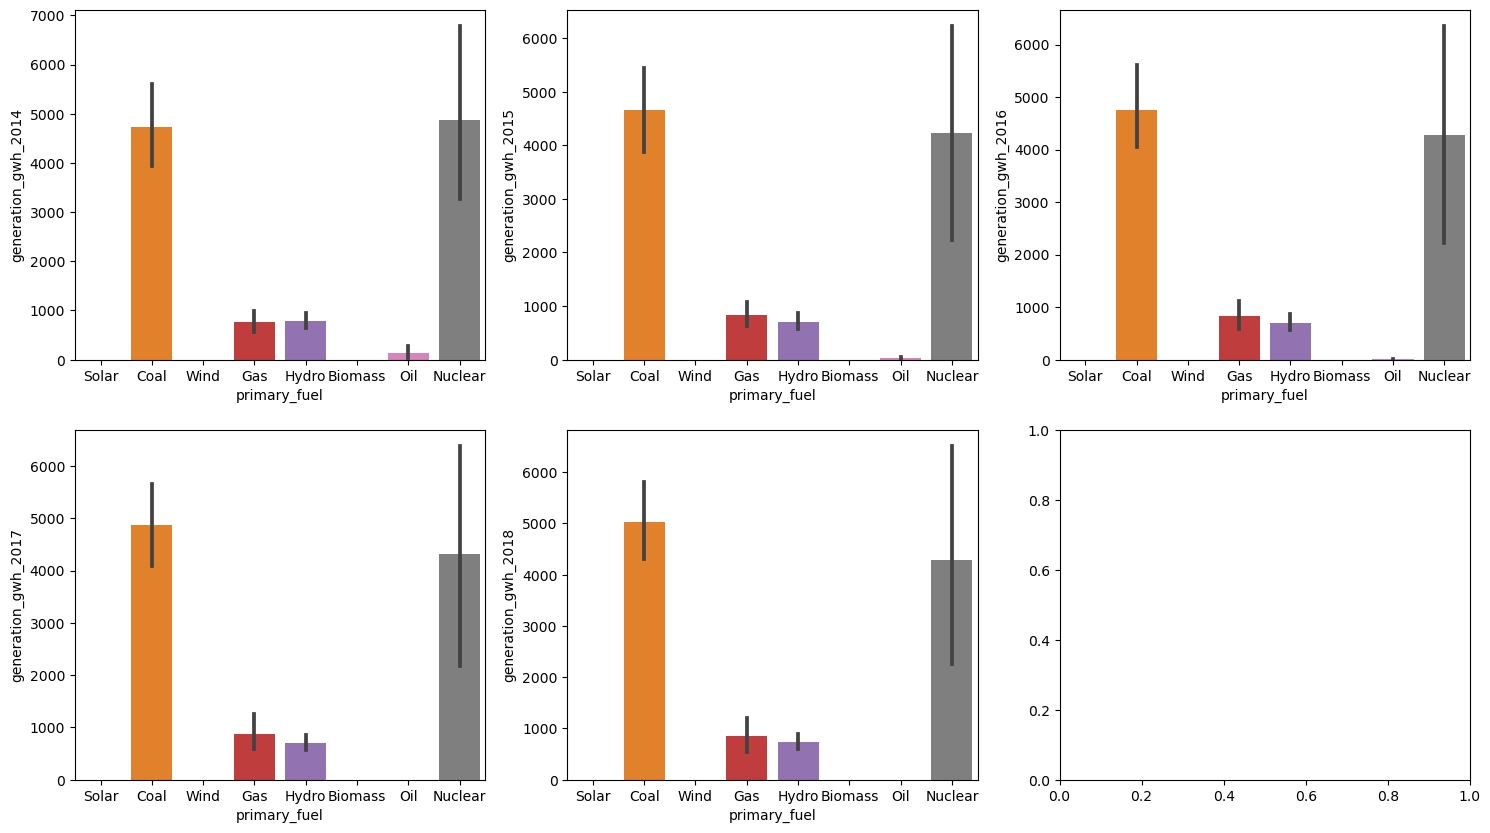

In [23]:
fig,axes=plt.subplots(2,3,figsize=(18,10))

# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2014', ax=axes[0,0], data=data)

# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015', ax=axes[0,1], data=data)

# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016', ax=axes[0,2], data=data)

# Checking generation growth in 2017
sns.barplot(x='primary_fuel',y='generation_gwh_2017', ax=axes[1,0], data=data)

# Checking generation growth in 2018
sns.barplot(x='primary_fuel',y='generation_gwh_2018', ax=axes[1,1], data=data)

plt.show()

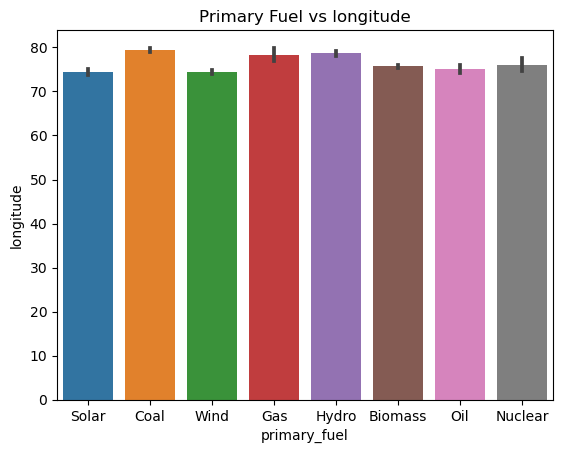

In [24]:
plt.title('Primary Fuel vs longitude')

sns.barplot(x='primary_fuel',y='longitude', data=data)

plt.show()

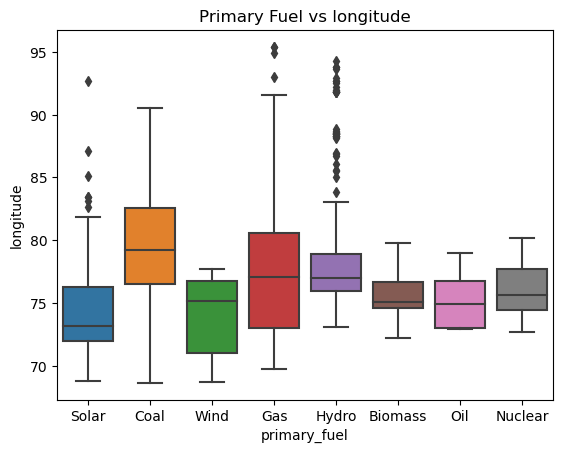

In [25]:
plt.title('Primary Fuel vs longitude')

sns.boxplot(x='primary_fuel',y='longitude', data=data)

plt.show()

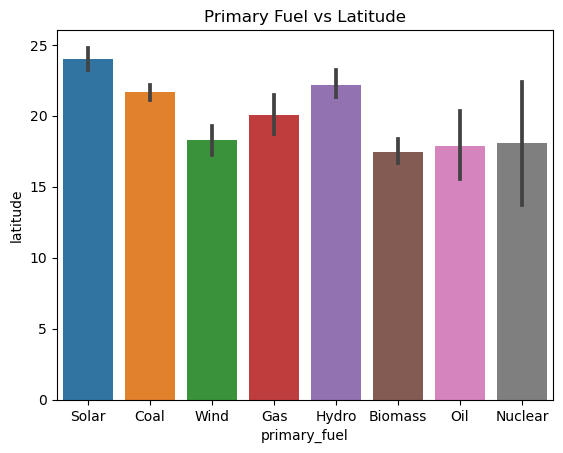

In [26]:
plt.title('Primary Fuel vs Latitude')
sns.barplot(x='primary_fuel',y='latitude', data=data)
plt.show()


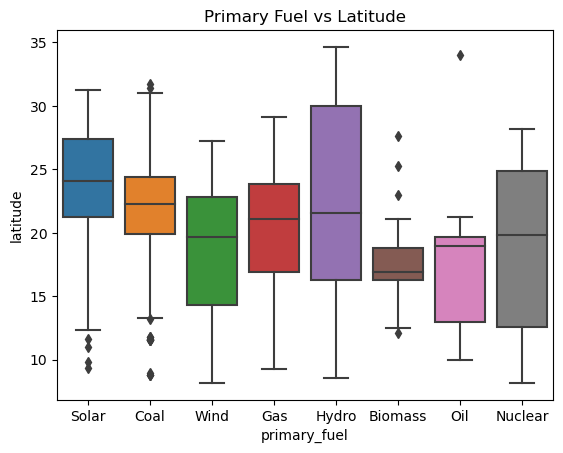

In [27]:
plt.title('Primary Fuel vs Latitude')
sns.boxplot(x='primary_fuel',y='latitude', data=data)
plt.show()


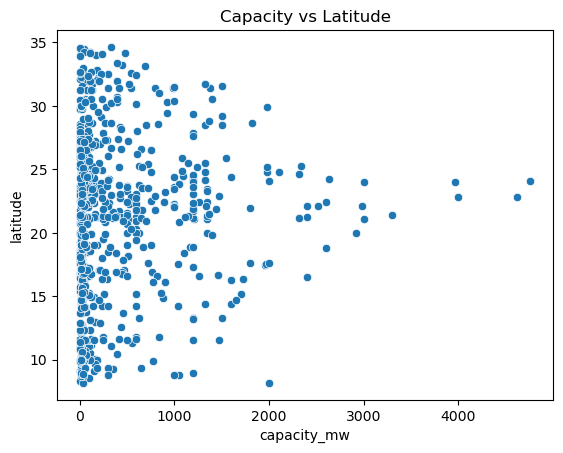

In [28]:
plt.title('Capacity vs Latitude')
sns.scatterplot(x='capacity_mw',y='latitude', data=data)
plt.show()


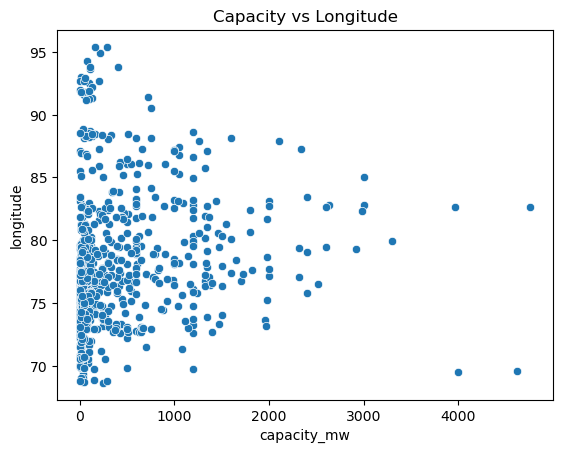

In [29]:
plt.title('Capacity vs Longitude')
sns.scatterplot(x='capacity_mw',y='longitude', data=data)
plt.show()


In [30]:
#No significant effect of location on capacity  

<AxesSubplot:xlabel='capacity_mw', ylabel='commissioning_year'>

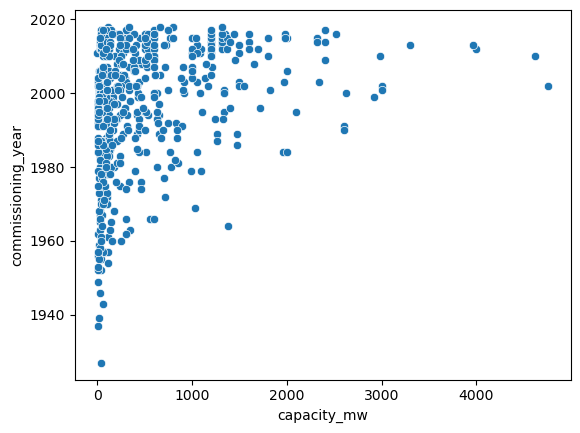

In [31]:
sns.scatterplot(x = "capacity_mw", y = "commissioning_year", data = data)

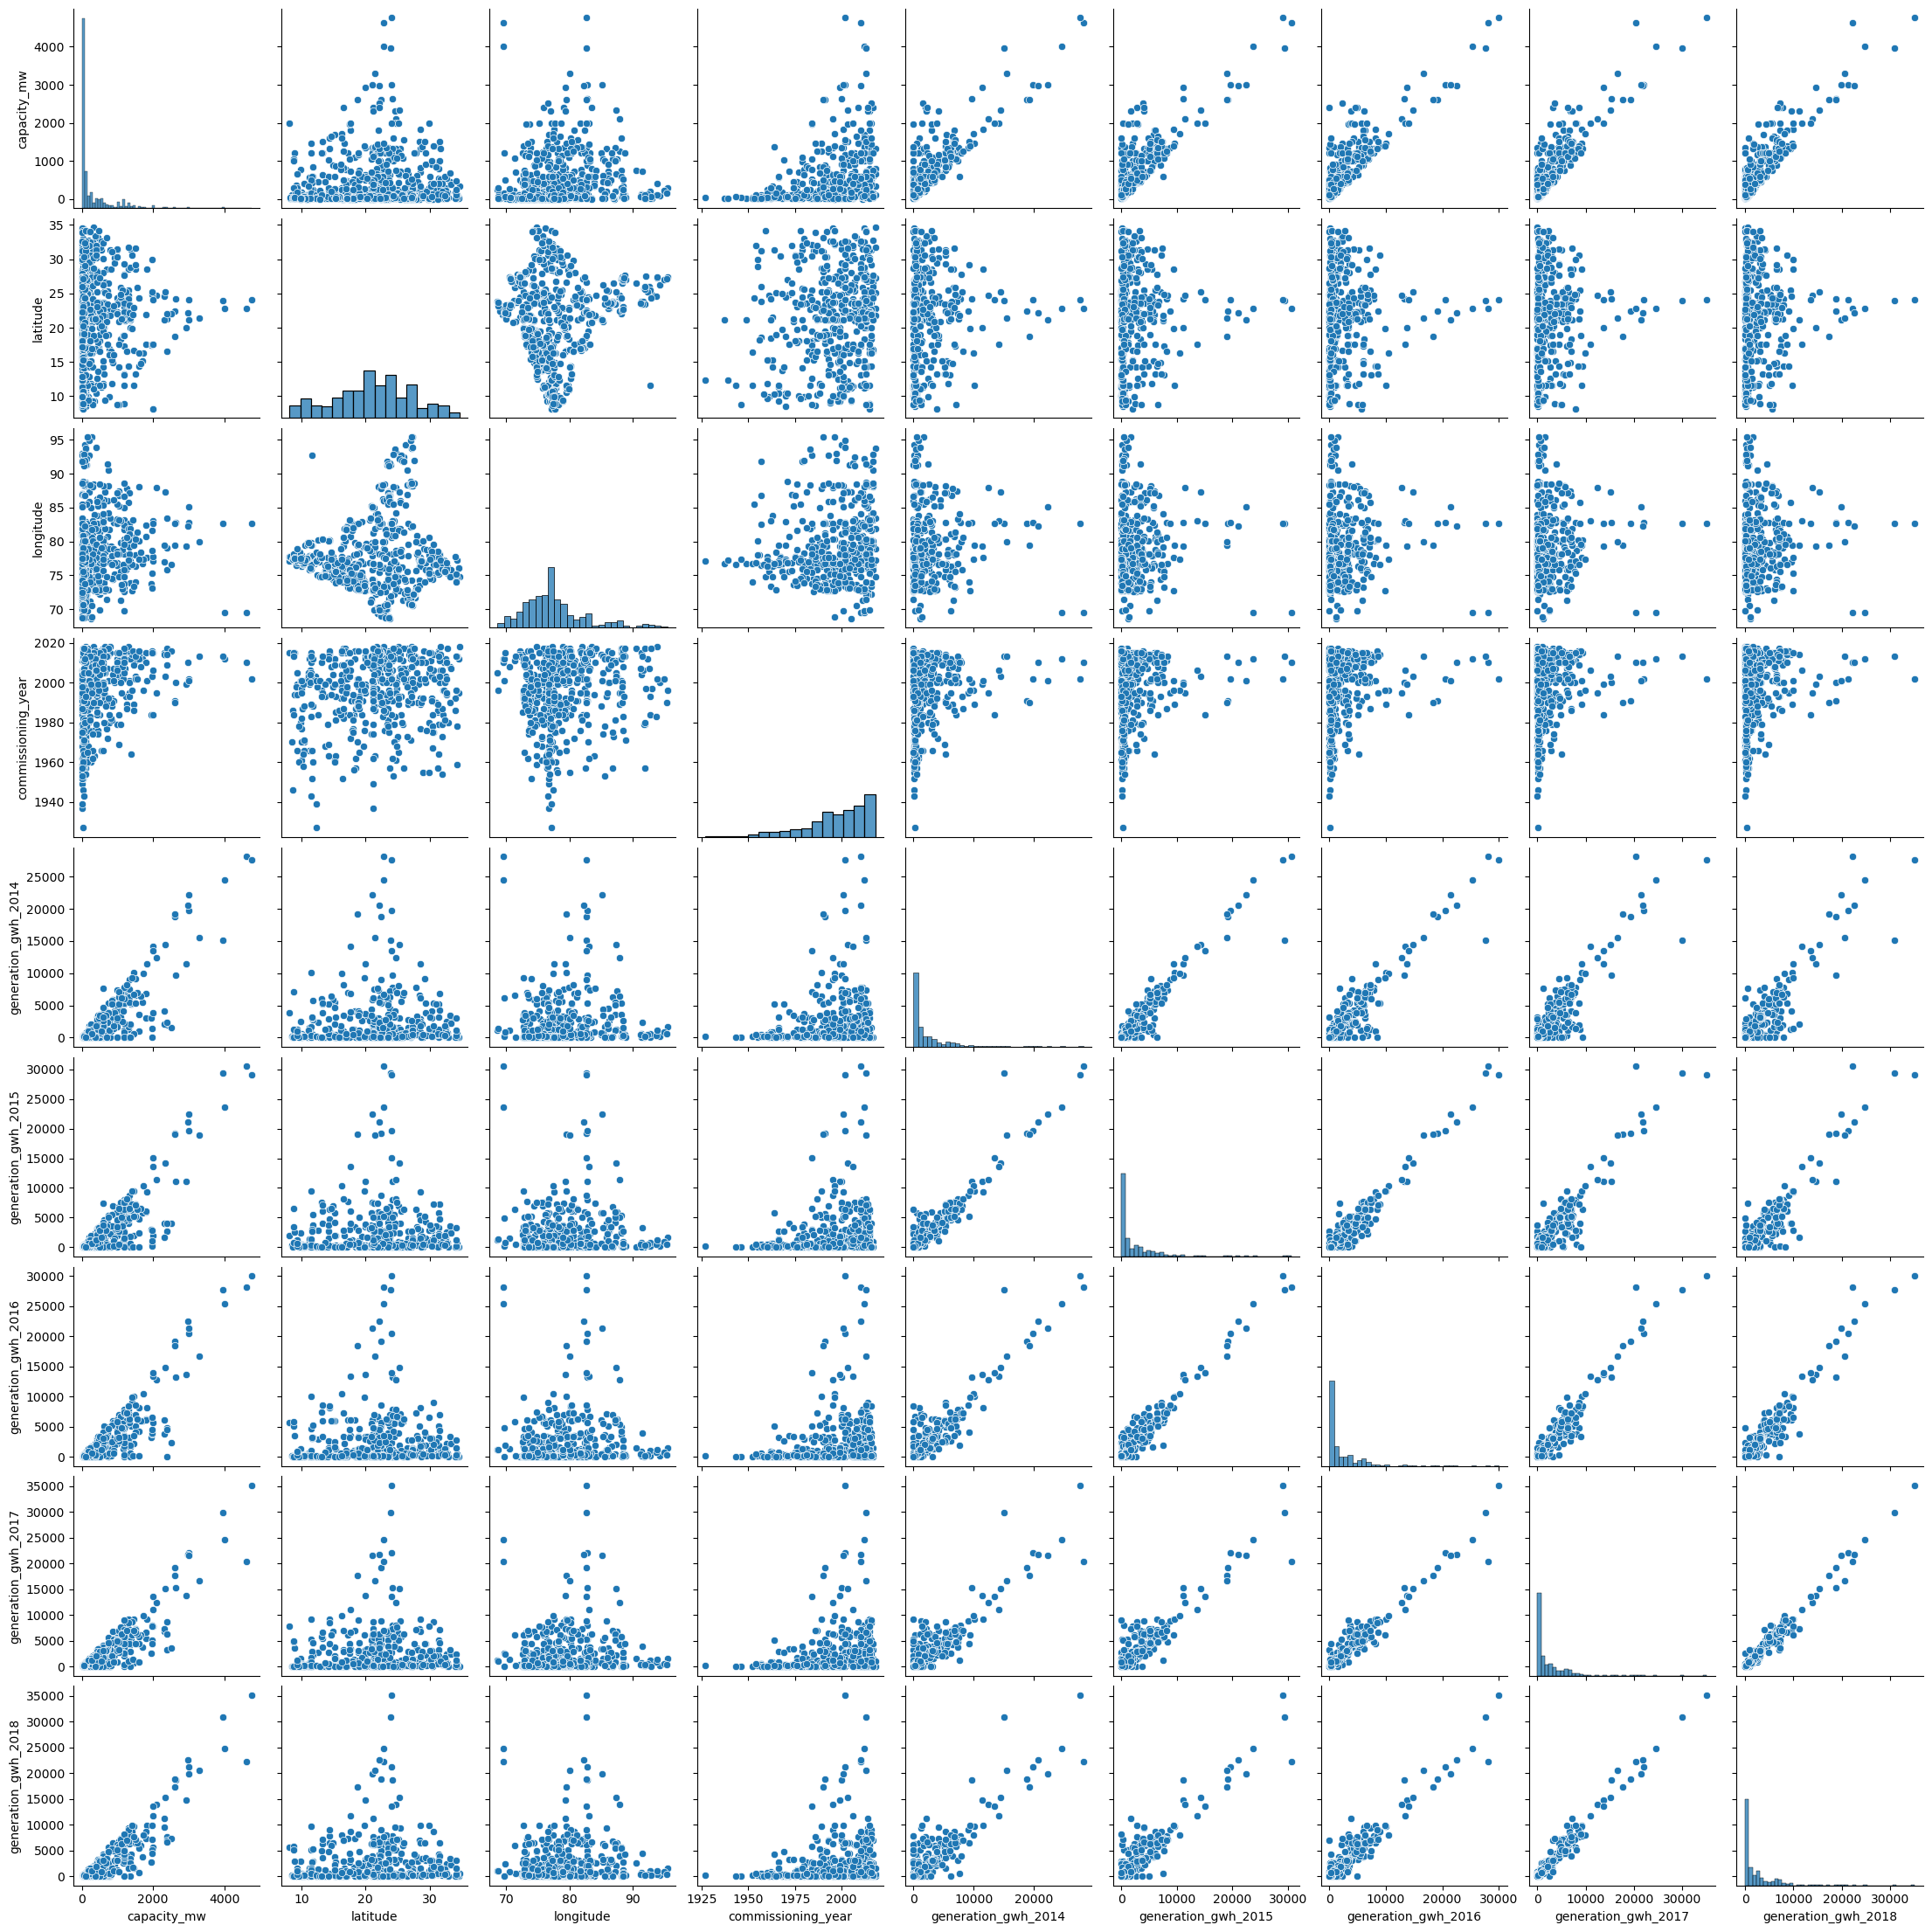

In [32]:
sns.pairplot(data)

In [33]:
data.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [34]:
data.drop(columns=['name', 'generation_data_source'], axis=1, inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   other_fuel1          198 non-null    object 
 5   commissioning_year   527 non-null    float64
 6   source               907 non-null    object 
 7   geolocation_source   907 non-null    object 
 8   generation_gwh_2014  398 non-null    float64
 9   generation_gwh_2015  422 non-null    float64
 10  generation_gwh_2016  434 non-null    float64
 11  generation_gwh_2017  440 non-null    float64
 12  generation_gwh_2018  448 non-null    float64
dtypes: float64(9), object(4)
memory usage: 92.2+ KB


In [36]:
cat_columns=['primary_fuel', 'other_fuel1', 'source','geolocation_source']

# Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_columns:
    data[i]=le.fit_transform(data[i])
    
data.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,3,2011.0,109,1,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,1,3,NaN,174,2,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,NaN,21,2,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,2004.0,22,2,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.0,22,2,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


# Outliers detection and removal

In [38]:
data['commissioning_year'].max()

2018.0

In [39]:
data['pp_age']=2018-data['commissioning_year']

data.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,pp_age
0,2.5,28.1839,73.2407,6,3,2011.0,109,1,NaN,NaN,NaN,NaN,NaN,7.0
1,98.0,24.7663,74.6090,1,3,NaN,174,2,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,NaN,21,2,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,2004.0,22,2,617.789264,843.747,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,2015.0,22,2,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,3.0


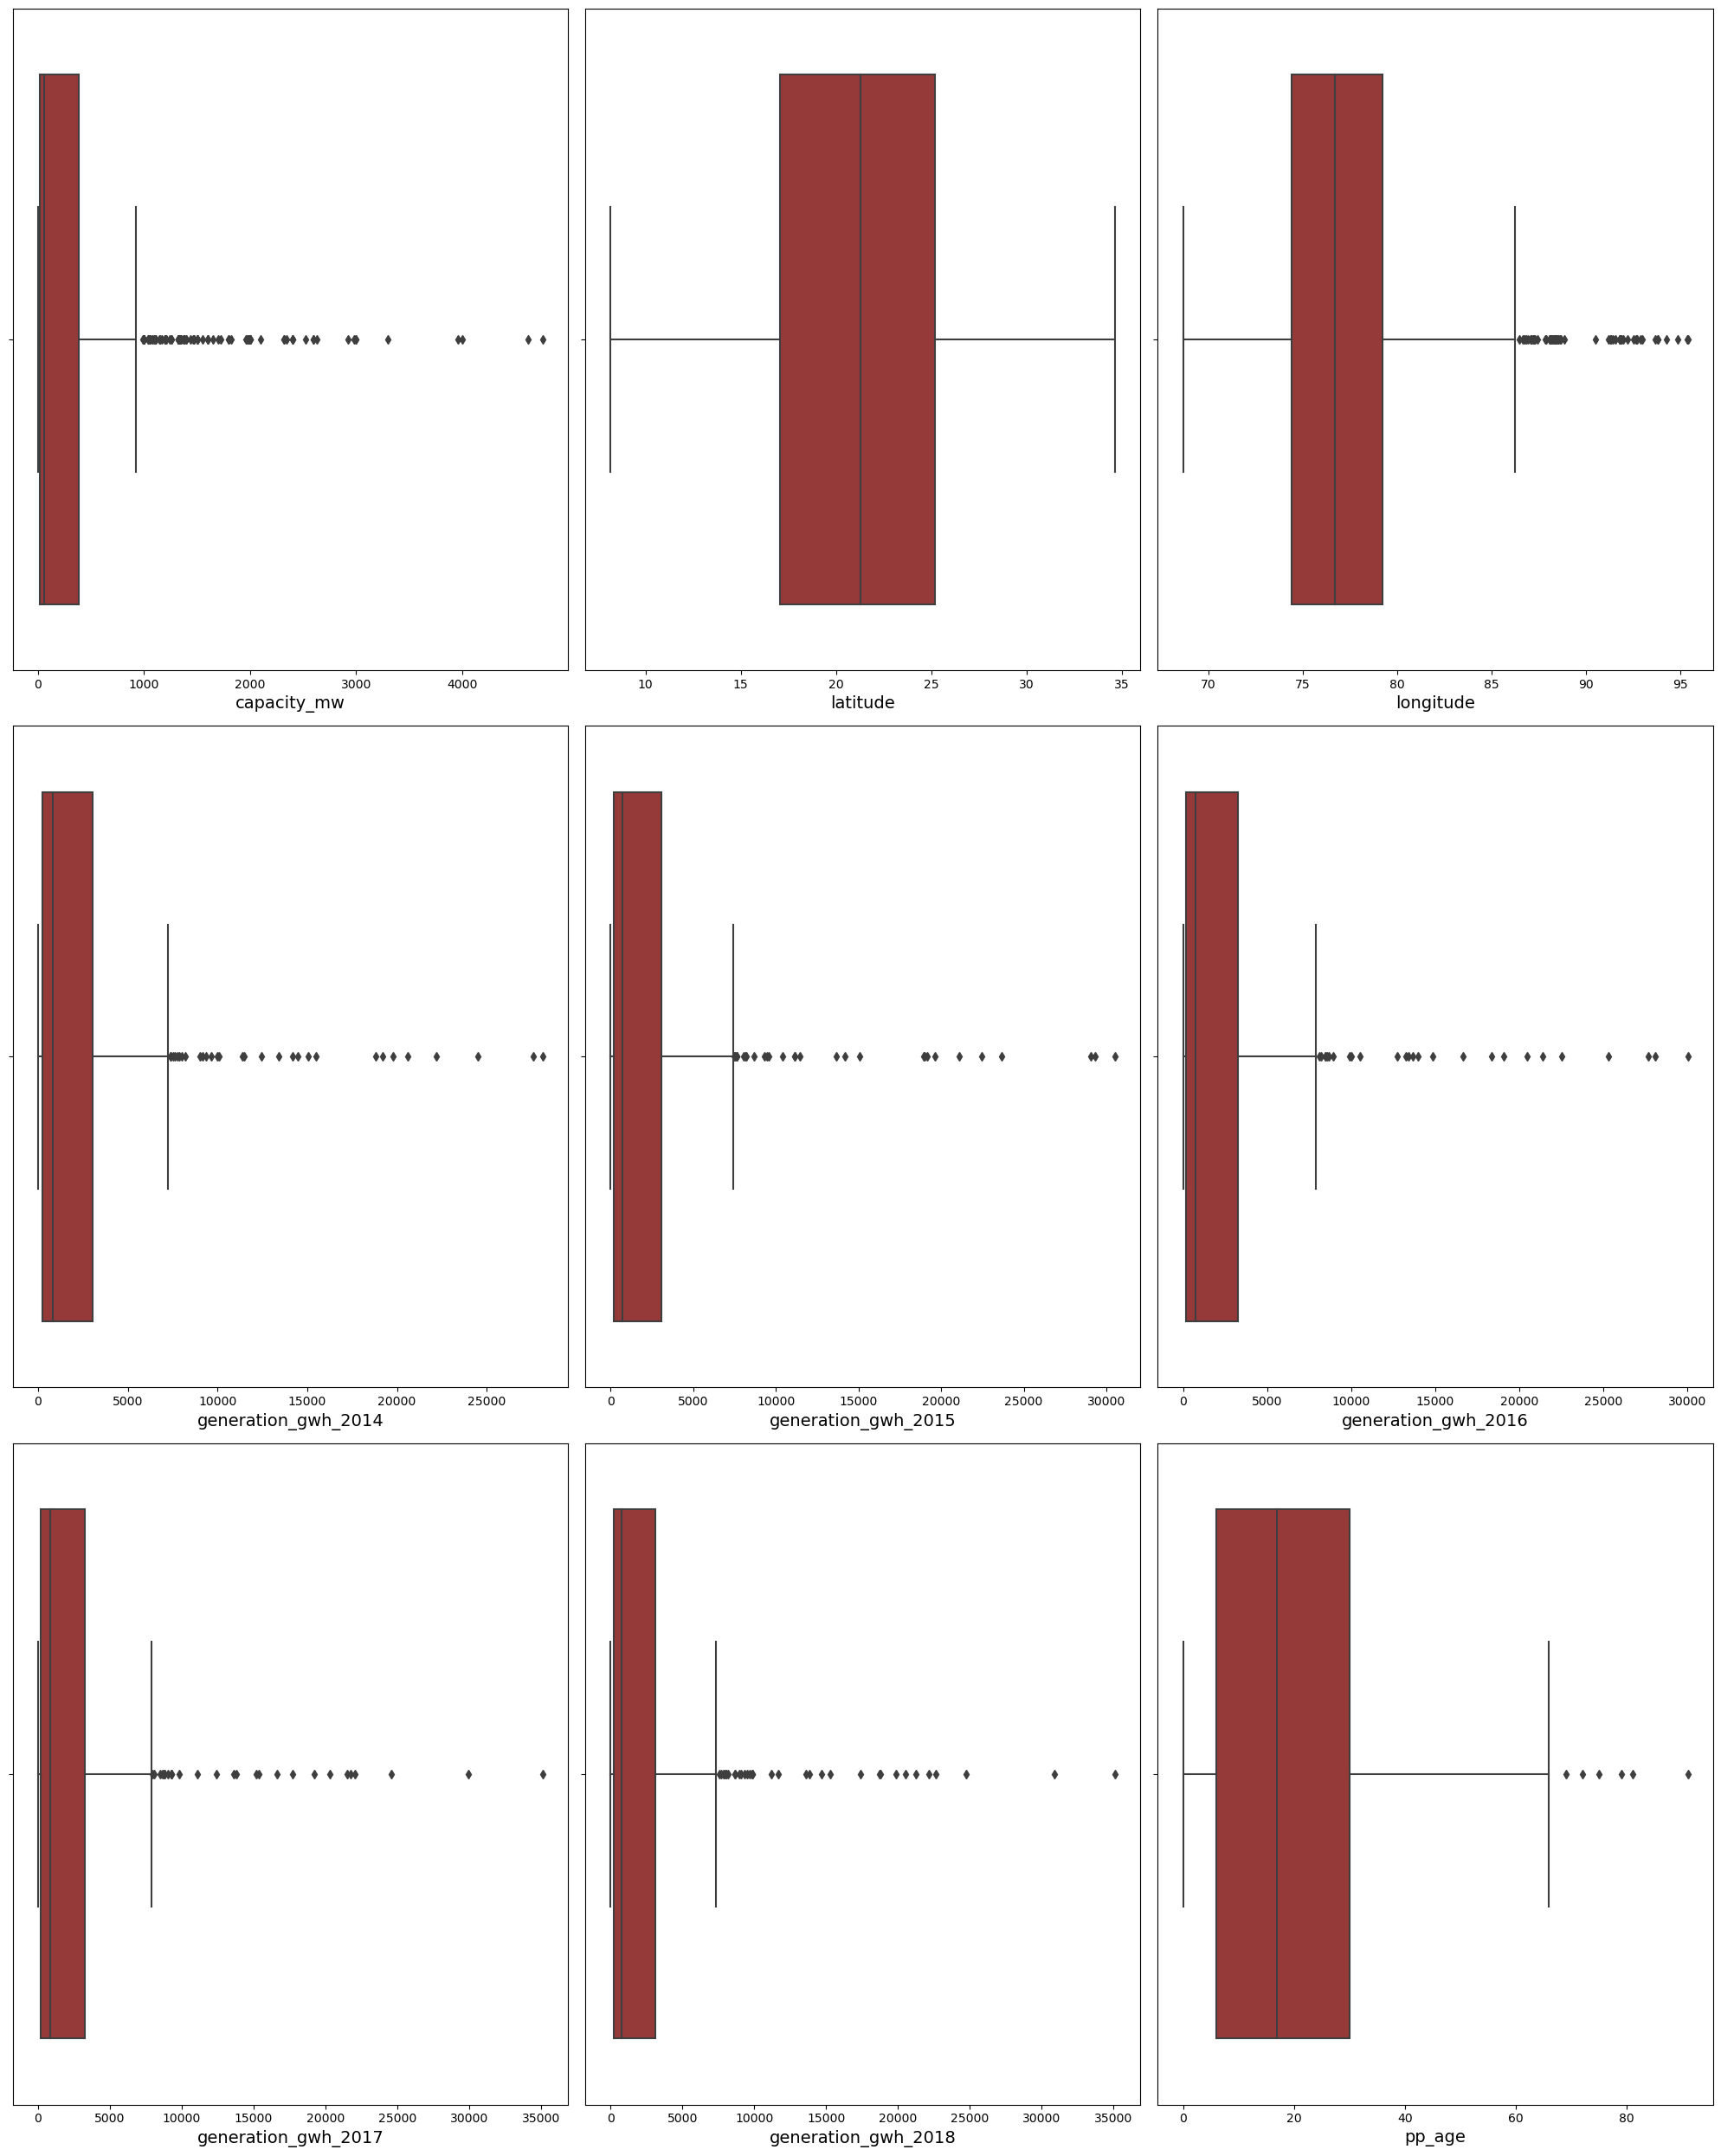

In [40]:
num_columns=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',  'pp_age']

plt.figure(figsize=(20,25))
plotnumber=1
for col in num_columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[col],color='brown')
        plt.xlabel(col,fontsize=14)
    plotnumber+=1
plt.tight_layout()

In [41]:
data.drop(columns=['source', 'geolocation_source', 'commissioning_year'], axis=1, inplace=True)

In [42]:
data_copy=data.copy()
Q1=data_copy.quantile(0)
Q3=data_copy.quantile(0.85)
IQR=Q3-Q1
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
pp_age                   39.00000
dtype: float64


In [43]:
data=data_copy[~((data_copy<(Q1-1.5*IQR)| (data_copy>(Q3+1.5*IQR))).any(axis=1))]
data.shape

(784, 11)

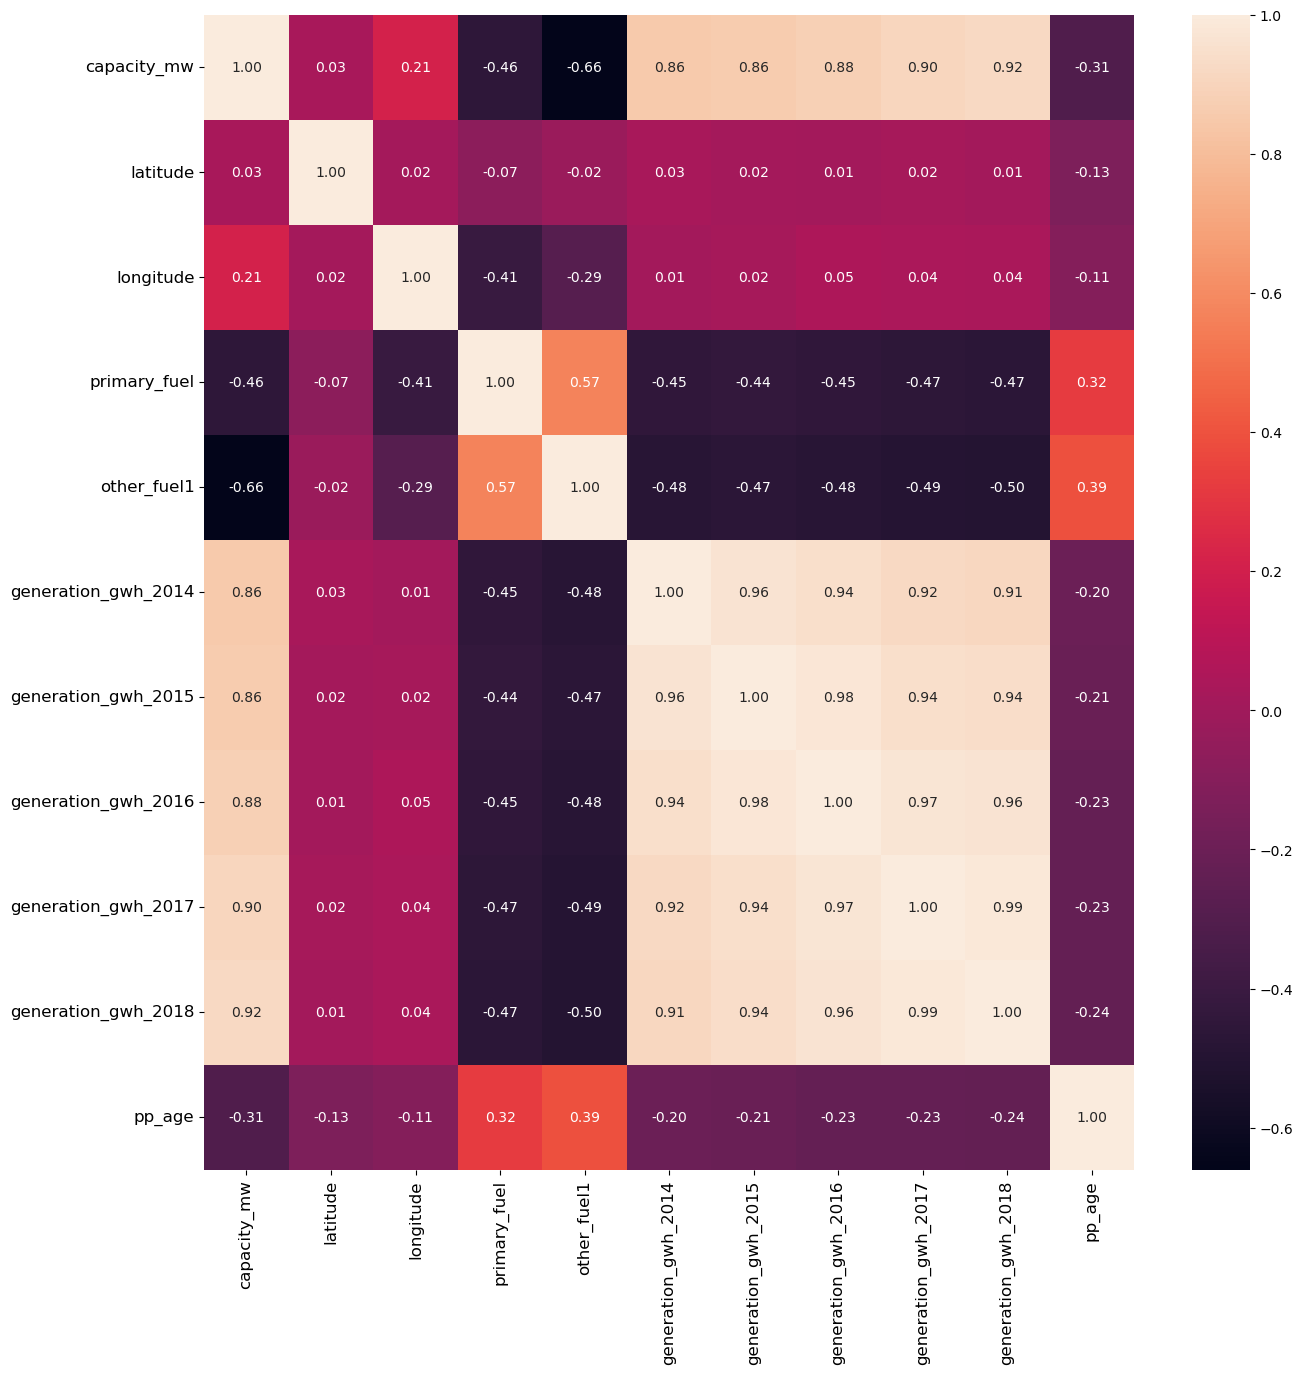

In [44]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, fmt='0.2f')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Model Building- Primary fuel

In [45]:
data.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1              0
generation_gwh_2014    443
generation_gwh_2015    426
generation_gwh_2016    415
generation_gwh_2017    407
generation_gwh_2018    407
pp_age                 329
dtype: int64

In [46]:
data['pp_age']=data['pp_age'].fillna(data['pp_age'].mean())
data.drop(columns=['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'], axis=1, inplace=True)

In [47]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,pp_age
0,2.5,28.1839,73.2407,6,3,7.00000
1,98.0,24.7663,74.6090,1,3,21.96044
2,39.2,21.9038,69.3732,7,3,21.96044
3,135.0,23.8712,91.3602,2,3,14.00000
4,1800.0,21.9603,82.4091,1,2,3.00000


In [48]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, GradientBoostingClassifier, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor, XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, f1_score, r2_score, mean_squared_error, mean_absolute_error 

In [49]:
X = data.drop(['primary_fuel'], axis =1)
y = data['primary_fuel']

In [50]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, random_state=99, test_size=.3)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(548, 5) (548,) (236, 5) (236,)


# Finding best Random state

In [52]:
max_accu=0
best_randomstate=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,y,test_size = 0.2, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>max_accu:
        max_accu=acc
        best_randomstate=i
print(max_accu ,best_randomstate)

0.7261146496815286 192


# Logistics Regression Model

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, random_state=192, test_size=.2)
lr=LogisticRegression()
lr.fit(X_train,Y_train)
lr_pred=lr.predict(X_test)
lr_acc_score=accuracy_score(Y_test, lr_pred)
lr_acc_score

0.7261146496815286

In [54]:
lr_con_mat=confusion_matrix(Y_test, lr_pred)
lr_cl_report=classification_report(Y_test, lr_pred)
print(lr_con_mat)
print(lr_cl_report)

[[35  0  8  0  3  2]
 [ 0  0  8  0  0  0]
 [ 0  0 39  0  4  4]
 [ 0  0  1  0  0  1]
 [ 0  0  4  0 18  6]
 [ 0  0  2  0  0 22]]
              precision    recall  f1-score   support

           1       1.00      0.73      0.84        48
           2       0.00      0.00      0.00         8
           3       0.63      0.83      0.72        47
           5       0.00      0.00      0.00         2
           6       0.72      0.64      0.68        28
           7       0.63      0.92      0.75        24

    accuracy                           0.73       157
   macro avg       0.50      0.52      0.50       157
weighted avg       0.72      0.73      0.71       157



In [55]:
lr_cv_score = cross_val_score(lr, X_scale, y, cv =5)
lr_mean_cv_score=lr_cv_score.mean()
lr_mean_cv_score

0.6224644781969622

# Random Forest Classifier

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, random_state=192, test_size=.2)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
rfc_pred=rfc.predict(X_test)
rfc_acc_score=accuracy_score(Y_test, rfc_pred)
rfc_con_mat=confusion_matrix(Y_test, rfc_pred)
rfc_cl_report=classification_report(Y_test, rfc_pred)
rfc_cv_score = cross_val_score(rfc, X_scale, y, cv =5)
rfc_mean_cv_score=rfc_cv_score.mean()
print(rfc_acc_score)
print(rfc_mean_cv_score)
print(rfc_con_mat)
print(rfc_cl_report)


0.8726114649681529
0.8635146170178016
[[45  0  0  0  0  3]
 [ 1  3  4  0  0  0]
 [ 0  0 44  0  0  3]
 [ 1  0  1  0  0  0]
 [ 2  0  0  0 22  4]
 [ 0  0  0  0  1 23]]
              precision    recall  f1-score   support

           1       0.92      0.94      0.93        48
           2       1.00      0.38      0.55         8
           3       0.90      0.94      0.92        47
           5       0.00      0.00      0.00         2
           6       0.96      0.79      0.86        28
           7       0.70      0.96      0.81        24

    accuracy                           0.87       157
   macro avg       0.74      0.67      0.68       157
weighted avg       0.88      0.87      0.86       157



# Decision Tree Classifier

In [57]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
dtc_pred=dtc.predict(X_test)
dtc_acc_score = accuracy_score(Y_test, dtc_pred)
dtc_con_mat=confusion_matrix(Y_test, dtc_pred)
dtc_cl_report=classification_report(Y_test, dtc_pred)
dtc_cv_score = cross_val_score(dtc, X_scale, y, cv =5)
dtc_mean_cv_score=dtc_cv_score.mean()
print(dtc_acc_score)
print(dtc_mean_cv_score)
print(dtc_con_mat)
print(dtc_cl_report)

0.8662420382165605
0.809921607055365
[[45  0  0  0  0  0  3]
 [ 1  5  2  0  0  0  0]
 [ 0  1 44  1  0  1  0]
 [ 0  0  0  0  0  0  0]
 [ 1  0  1  0  0  0  0]
 [ 1  0  0  0  0 21  6]
 [ 0  0  0  0  0  3 21]]
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        48
           2       0.83      0.62      0.71         8
           3       0.94      0.94      0.94        47
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         2
           6       0.84      0.75      0.79        28
           7       0.70      0.88      0.78        24

    accuracy                           0.87       157
   macro avg       0.61      0.59      0.59       157
weighted avg       0.87      0.87      0.86       157



# Gradient Boosting Classifier

In [58]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train, Y_train)
gbc_pred=gbc.predict(X_test)
gbc_acc_score = accuracy_score(Y_test, gbc_pred)
gbc_con_mat=confusion_matrix(Y_test, gbc_pred)
gbc_cl_report=classification_report(Y_test, gbc_pred)
gbc_cv_score = cross_val_score(gbc, X_scale, y, cv =5)
gbc_mean_cv_score=gbc_cv_score.mean()
print(gbc_acc_score)
print(gbc_mean_cv_score)
print(gbc_con_mat)
print(gbc_cl_report)

0.8789808917197452
0.8596929609668462
[[47  0  0  0  0  1]
 [ 1  4  3  0  0  0]
 [ 0  1 44  0  1  1]
 [ 1  0  1  0  0  0]
 [ 1  0  1  0 21  5]
 [ 1  0  0  0  1 22]]
              precision    recall  f1-score   support

           1       0.92      0.98      0.95        48
           2       0.80      0.50      0.62         8
           3       0.90      0.94      0.92        47
           5       0.00      0.00      0.00         2
           6       0.91      0.75      0.82        28
           7       0.76      0.92      0.83        24

    accuracy                           0.88       157
   macro avg       0.72      0.68      0.69       157
weighted avg       0.87      0.88      0.87       157



# Gaussian Naive Bayes Classifier

In [59]:
gnb=GaussianNB()
gnb.fit(X_train, Y_train)
gnb_pred=gnb.predict(X_test)
gnb_acc_score = accuracy_score(Y_test, gnb_pred)
gnb_con_mat=confusion_matrix(Y_test, gnb_pred)
gnb_cl_report=classification_report(Y_test, gnb_pred)
gnb_cv_score = cross_val_score(gnb, X_scale, y, cv =5)
gnb_mean_cv_score=gnb_cv_score.mean()
print(gnb_acc_score)
print(gnb_mean_cv_score)
print(gnb_con_mat)
print(gnb_cl_report)

0.6305732484076433
0.5969377756001959
[[35  0  3  0  0  0 10]
 [ 0  0  6  1  0  0  1]
 [ 0  0 40  0  0  7  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  1]
 [ 0  0  3  0  0  0 25]
 [ 0  0  0  0  0  0 24]]
              precision    recall  f1-score   support

           1       1.00      0.73      0.84        48
           2       0.00      0.00      0.00         8
           3       0.77      0.85      0.81        47
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00        28
           7       0.39      1.00      0.56        24

    accuracy                           0.63       157
   macro avg       0.31      0.37      0.32       157
weighted avg       0.60      0.63      0.59       157



# Support Vector Classifier

In [60]:
svm=SVC()
svm.fit(X_train, Y_train)
svm_pred=svm.predict(X_test)
svm_acc_score = accuracy_score(Y_test, svm_pred)
svm_con_mat=confusion_matrix(Y_test, svm_pred)
svm_cl_report=classification_report(Y_test, svm_pred)
svm_cv_score = cross_val_score(svm, X_scale, y, cv =5)
svm_mean_cv_score=svm_cv_score.mean()
print(svm_acc_score)
print(svm_mean_cv_score)
print(svm_con_mat)
print(svm_cl_report)

0.6878980891719745
0.6607137024334475
[[37  0  1  0  5  5]
 [ 0  0  6  0  1  1]
 [ 6  0 36  0  0  5]
 [ 1  0  0  0  0  1]
 [ 0  0  2  0 19  7]
 [ 2  0  0  0  6 16]]
              precision    recall  f1-score   support

           1       0.80      0.77      0.79        48
           2       0.00      0.00      0.00         8
           3       0.80      0.77      0.78        47
           5       0.00      0.00      0.00         2
           6       0.61      0.68      0.64        28
           7       0.46      0.67      0.54        24

    accuracy                           0.69       157
   macro avg       0.45      0.48      0.46       157
weighted avg       0.66      0.69      0.67       157



# Stochastic Gradient Descent

In [61]:
sgd=SGDClassifier()
sgd.fit(X_train, Y_train)
sgd_pred=sgd.predict(X_test)
sgd_acc_score = accuracy_score(Y_test, sgd_pred)
sgd_con_mat=confusion_matrix(Y_test, sgd_pred)
sgd_cl_report=classification_report(Y_test, sgd_pred)
sgd_cv_score = cross_val_score(sgd, X_scale, y, cv =5)
sgd_mean_cv_score=sgd_cv_score.mean()
print(sgd_acc_score)
print(sgd_mean_cv_score)
print(sgd_con_mat)
print(sgd_cl_report)

0.6687898089171974
0.570276008492569
[[35  0  8  0  0  3  2]
 [ 0  0  4  2  0  1  1]
 [ 0  0 37  2  0  7  1]
 [ 0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  1]
 [ 0  0  2  0  0 24  2]
 [ 0  0  1  0  0 14  9]]
              precision    recall  f1-score   support

           1       1.00      0.73      0.84        48
           2       0.00      0.00      0.00         8
           3       0.70      0.79      0.74        47
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         2
           6       0.49      0.86      0.62        28
           7       0.56      0.38      0.45        24

    accuracy                           0.67       157
   macro avg       0.39      0.39      0.38       157
weighted avg       0.69      0.67      0.66       157



# Ada Boost Classifier

In [62]:
adc=AdaBoostClassifier()
adc.fit(X_train, Y_train)
adc_pred=adc.predict(X_test)
adc_acc_score = accuracy_score(Y_test, adc_pred)
adc_con_mat=confusion_matrix(Y_test, adc_pred)
adc_cl_report=classification_report(Y_test, adc_pred)
adc_cv_score = cross_val_score(adc, X_scale, y, cv =5)
adc_mean_cv_score=adc_cv_score.mean()
print(adc_acc_score)
print(adc_mean_cv_score)
print(adc_con_mat)
print(adc_cl_report)

0.33121019108280253
0.4311203658337416
[[ 0 32  0  3  0  1 12]
 [ 0  2  3  1  0  0  2]
 [ 0  8 34  2  0  0  3]
 [ 0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  1]
 [ 0 14  1  0  0  0 13]
 [ 0  8  0  0  0  0 16]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        48
           2       0.03      0.25      0.06         8
           3       0.87      0.72      0.79        47
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00        28
           7       0.34      0.67      0.45        24

    accuracy                           0.33       157
   macro avg       0.18      0.23      0.19       157
weighted avg       0.31      0.33      0.31       157



In [63]:
model_pf=pd.DataFrame({'Models':['Logistic Regression', 'Random Forest Classifier', 'Decision Tree', 'Gradient Boosting Classifier', 'Gaussian Naive Bayes Classifier', 'Support Vector Classifier', 'Stochastic Gradient Descent', 'AdaBoost Classifier'], 'Accuracy Score' : [lr_acc_score, rfc_acc_score,  dtc_acc_score, gbc_acc_score, gnb_acc_score, svm_acc_score, sgd_acc_score, adc_acc_score], 'F1 Score' : [lr_mean_cv_score, rfc_mean_cv_score,  dtc_mean_cv_score, gbc_mean_cv_score, gnb_mean_cv_score, svm_mean_cv_score, sgd_mean_cv_score, adc_mean_cv_score]})
model_pf

,Models,Accuracy Score,F1 Score
0,Logistic Regression,0.726115,0.622464
1,Random Forest Classifier,0.872611,0.863515
2,Decision Tree,0.866242,0.809922
3,Gradient Boosting Classifier,0.878981,0.859693
4,Gaussian Naive Bayes Classifier,0.630573,0.596938
5,Support Vector Classifier,0.687898,0.660714
6,Stochastic Gradient Descent,0.668790,0.570276
7,AdaBoost Classifier,0.331210,0.431120


In [64]:
#Gradient Boosting and Random Forest are the best models for Price prediction

# Model Building- Capacity

In [65]:
X1 = data.drop(['capacity_mw'], axis =1)
y1 = data['capacity_mw']

In [66]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X1_scale = scaler.fit_transform(X1)

In [67]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scale, y1, random_state=99, test_size=0.2)
print(X1_train.shape, y1_train.shape, X1_test.shape, y1_test.shape)

(627, 5) (627,) (157, 5) (157,)


In [68]:

max_r2=0
best_randomstate1=0
for i in range(1,300):
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scale, y1, test_size = 0.2, random_state=i)
    lin_reg=LinearRegression()
    lin_reg.fit(X1_train, y1_train)
    lin_reg_pred=lin_reg.predict(X1_test)
    R2=r2_score(y1_test,lin_reg_pred)
    if R2>max_r2:
        max_r2=R2
        best_randomstate1=i
        
print(max_r2 ,best_randomstate1)

0.6091529895878258 31


# Linear Regression

In [69]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=31, test_size=.2)

In [70]:
lin_reg=LinearRegression()
lin_reg.fit(X1_train,y1_train)
lin_reg_pred=lin_reg.predict(X1_test)
lin_reg_score=r2_score(y1_test,lin_reg_pred)
lin_reg_mae=mean_absolute_error(y1_test, lin_reg_pred )
lin_reg_mse=mean_squared_error(y1_test, lin_reg_pred )
lin_reg_rmse=lin_reg_mse**0.5
print('R2 Score : ', lin_reg_score)
print('Mean absolute error : ', lin_reg_mae)
print('Mean squared error : ', lin_reg_mse)
print('Root Mean Squared Error: ', lin_reg_rmse)

R2 Score :  0.609152989587826
Mean absolute error :  198.0473276317527
Mean squared error :  99556.39966885095
Root Mean Squared Error:  315.5255927319541


# Random Forest Regressor

In [71]:
rfr=RandomForestRegressor()
rfr.fit(X1_train,y1_train)
rfr_pred=rfr.predict(X1_test)
rfr_score=r2_score(y1_test,rfr_pred)
rfr_mae=mean_absolute_error(y1_test, rfr_pred )
rfr_mse=mean_squared_error(y1_test, rfr_pred )
rfr_rmse=rfr_mse**0.5
print('R2 Score : ', rfr_score)
print('Mean absolute error : ', rfr_mae)
print('Mean squared error : ', rfr_mse)
print('Root Mean Squared Error: ', rfr_rmse)

R2 Score :  0.5232209957157521
Mean absolute error :  195.93163316138182
Mean squared error :  121444.96398778369
Root Mean Squared Error:  348.48954645409907


# Decision Tree Regressor

In [72]:
dtr=DecisionTreeRegressor()
dtr.fit(X1_train,y1_train)
dtr_pred=dtr.predict(X1_test)
dtr_score=r2_score(y1_test, dtr_pred)
dtr_mae=mean_absolute_error(y1_test, dtr_pred )
dtr_mse=mean_squared_error(y1_test, dtr_pred )
dtr_rmse=dtr_mse**0.5
print('R2 Score : ', dtr_score)
print('Mean absolute error : ', dtr_mae)
print('Mean squared error : ', dtr_mse)
print('Root Mean Squared Error: ', dtr_rmse)

R2 Score :  0.009264791091824653
Mean absolute error :  253.5180414012739
Mean squared error :  252359.69009983918
Root Mean Squared Error:  502.3541480866254


# Gradient Boosting Regressor

In [73]:
gbr=GradientBoostingRegressor()
gbr.fit(X1_train,y1_train)
gbr_pred=gbr.predict(X1_test)
gbr_score=r2_score(y1_test, gbr_pred)
gbr_mae=mean_absolute_error(y1_test, gbr_pred)
gbr_mse=mean_squared_error(y1_test, gbr_pred )
gbr_rmse=gbr_mse**0.5
print('R2 Score : ', gbr_score)
print('Mean absolute error : ', gbr_mae)
print('Mean squared error : ', gbr_mse)
print('Root Mean Squared Error: ', gbr_rmse)

R2 Score :  0.5705561666639909
Mean absolute error :  195.85953139683085
Mean squared error :  109387.76750994298
Root Mean Squared Error:  330.7382159804684


# Support Vector Regressor

In [74]:
svr=SVR()
svr.fit(X1_train,y1_train)
svr_pred=svr.predict(X1_test)
svr_score=r2_score(y1_test, svr_pred)
svr_mae=mean_absolute_error(y1_test, svr_pred)
svr_mse=mean_squared_error(y1_test, svr_pred)
svr_rmse=svr_mse**0.5
print('R2 Score : ', svr_score)
print('Mean absolute error : ', svr_mae)
print('Mean squared error : ', svr_mse)
print('Root Mean Squared Error: ', svr_rmse)

R2 Score :  -0.22735980984028714
Mean absolute error :  284.0867861845315
Mean squared error :  312632.6171385717
Root Mean Squared Error:  559.1355981678968


# Stochastic Gradient Descent Regressor

In [75]:
sgdr=SGDRegressor()
sgdr.fit(X1_train,y1_train)
sgdr_pred=sgdr.predict(X1_test)
sgdr_score=r2_score(y1_test, sgdr_pred)
sgdr_mae=mean_absolute_error(y1_test, sgdr_pred )
sgdr_mse=mean_squared_error(y1_test, sgdr_pred )
sgdr_rmse=sgdr_mse**0.5
print('R2 Score : ', sgdr_score)
print('Mean absolute error : ', sgdr_mae)
print('Mean squared error : ', sgdr_mse)
print('Root Mean Squared Error: ', sgdr_rmse)

R2 Score :  -3.0747502440918815e+18
Mean absolute error :  723838062171.9321
Mean squared error :  7.831991956645493e+23
Root Mean Squared Error:  884985421159.3258


# AdaBoost Regressor

In [76]:
adbr=AdaBoostRegressor()
adbr.fit(X1_train,y1_train)
adbr_pred=adbr.predict(X1_test)
adbr_score=r2_score(y1_test, adbr_pred)
adbr_mae=mean_absolute_error(y1_test, adbr_pred )
adbr_mse=mean_squared_error(y1_test, adbr_pred )
adbr_rmse=lin_reg_mse**0.5
print('R2 Score : ', adbr_score)
print('Mean absolute error : ', adbr_mae)
print('Mean squared error : ', adbr_mse)
print('Root Mean Squared Error: ', adbr_rmse)

R2 Score :  0.29735244180987097
Mean absolute error :  368.79990975496366
Mean squared error :  178978.11487862878
Root Mean Squared Error:  315.5255927319541


In [77]:
model_cap=pd.DataFrame({'Models':['Linear Regression', 'Random Forest Regressor', 'Decision Tree Regressor', 'Gradient Boosting Regressor', 'Support Vector Regressor', 'Stochastic Gradient Descent Regressor', 'AdaBoost Regressor'], 'R2 Score' : [lin_reg_score, rfr_score,  dtr_score, gbr_score, svr_score, sgdr_score, adbr_score], 'Root Mean Squared Error' : [lin_reg_rmse, rfr_rmse,  dtr_rmse, gbr_rmse, svr_rmse, sgdr_rmse, adbr_rmse]})
model_cap

,Models,R2 Score,Root Mean Squared Error
0,Linear Regression,6.091530e-01,3.155256e+02
1,Random Forest Regressor,5.232210e-01,3.484895e+02
2,Decision Tree Regressor,9.264791e-03,5.023541e+02
3,Gradient Boosting Regressor,5.705562e-01,3.307382e+02
4,Support Vector Regressor,-2.273598e-01,5.591356e+02
5,Stochastic Gradient Descent Regressor,-3.074750e+18,8.849854e+11
6,AdaBoost Regressor,2.973524e-01,3.155256e+02


In [ ]:
#R2 score is max and RMSE is minimum for Linear Regression Model